#  **Q-Learning & SARSA**

In [74]:
!pip install gymnasium

Defaulting to user installation because normal site-packages is not writeable


In [75]:
import gymnasium as gym
import numpy as np
import random
import time
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [76]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [77]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

## Q-Learning

In [78]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

## SARSA

In [79]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)

            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action
            
            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

## FrozenLake-v1

#### *Q-Learning*

In [80]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

q_table_1 = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [81]:
q_table_1, rewards_all_1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [82]:
q_table_1

array([[0.54095822, 0.51320994, 0.4961919 , 0.50370454],
       [0.26090712, 0.30764024, 0.27718158, 0.50473555],
       [0.28347449, 0.31732014, 0.30408063, 0.45223999],
       [0.1910336 , 0.25433641, 0.15915365, 0.43230786],
       [0.54753481, 0.42346844, 0.26338208, 0.40241558],
       [0.        , 0.        , 0.        , 0.        ],
       [0.31570342, 0.0967025 , 0.13047605, 0.14416516],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35515984, 0.35533359, 0.50286189, 0.56976639],
       [0.38975725, 0.62336985, 0.4888823 , 0.46857859],
       [0.60759988, 0.26278726, 0.38454374, 0.32988343],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35891216, 0.52661004, 0.7329404 , 0.4875487 ],
       [0.75689787, 0.86273607, 0.76517539, 0.74820608],
       [0.        , 0.        , 0.        , 0.        ]])

In [83]:
print(sum(rewards_all_1))
print(sum(rewards_all_1[0:1000]))
print(sum(rewards_all_1[1000:2000]))
print(sum(rewards_all_1[2000:3000]))
print(sum(rewards_all_1[9000:10000]))
print(sum(rewards_all_1[19000:20000]))

12750.0
219.0
526.0
571.0
665.0
697.0


In [84]:
play_multiple_times(env, q_table_1, 1000)

Number of successes: 728/1000
Average number of steps: 37.59478021978022


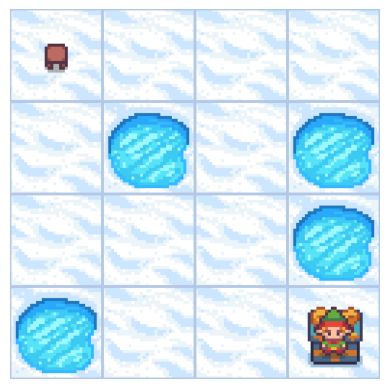

(1.0, 9)

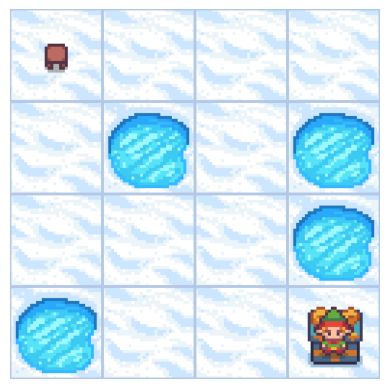

In [24]:
play(env, q_table_1, render=True)

#### *SARSA*

In [85]:
# Initialize Q-value table randomly
q_table_2 = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_2)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [86]:
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [87]:
q_table_2

array([[0.5437484 , 0.49512566, 0.46624347, 0.45691597],
       [0.28343534, 0.16490823, 0.18333403, 0.47121868],
       [0.35368973, 0.1584594 , 0.22786678, 0.21816816],
       [0.19227218, 0.        , 0.        , 0.        ],
       [0.5665356 , 0.25298357, 0.24523233, 0.38206482],
       [0.        , 0.        , 0.        , 0.        ],
       [0.15253982, 0.09699304, 0.30134799, 0.13258837],
       [0.        , 0.        , 0.        , 0.        ],
       [0.45641751, 0.4440543 , 0.36995314, 0.61608531],
       [0.41221863, 0.67249067, 0.44292891, 0.41473778],
       [0.70347021, 0.36248996, 0.34068315, 0.34961728],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.56295513, 0.51146794, 0.74201878, 0.47409681],
       [0.67121045, 0.87171505, 0.71020003, 0.78045687],
       [0.        , 0.        , 0.        , 0.        ]])

In [88]:
print(sum(rewards_all_2))
print(sum(rewards_all_2[0:1000]))
print(sum(rewards_all_2[1000:2000]))
print(sum(rewards_all_2[2000:3000]))
print(sum(rewards_all_2[9000:10000]))
print(sum(rewards_all_2[11000:12000]))
print(sum(rewards_all_2[14000:15000]))
print(sum(rewards_all_2[19000:20000]))

12688.0
225.0
551.0
673.0
649.0
674.0
649.0
689.0


In [89]:
play_multiple_times(env, q_table_2, 1000)

Number of successes: 726/1000
Average number of steps: 37.12534435261708


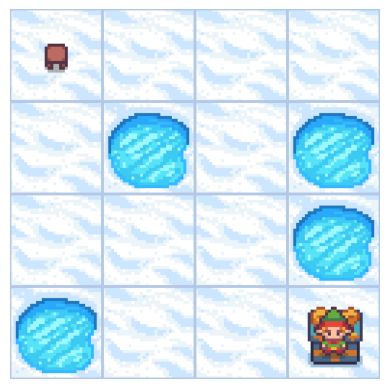

(1.0, 54)

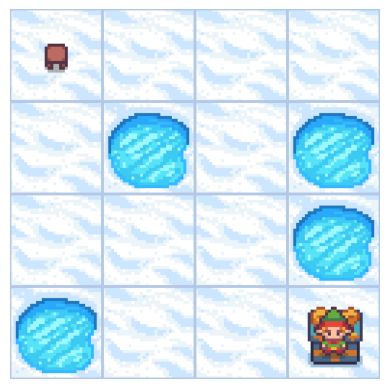

In [30]:
play(env, q_table_2, render=True)

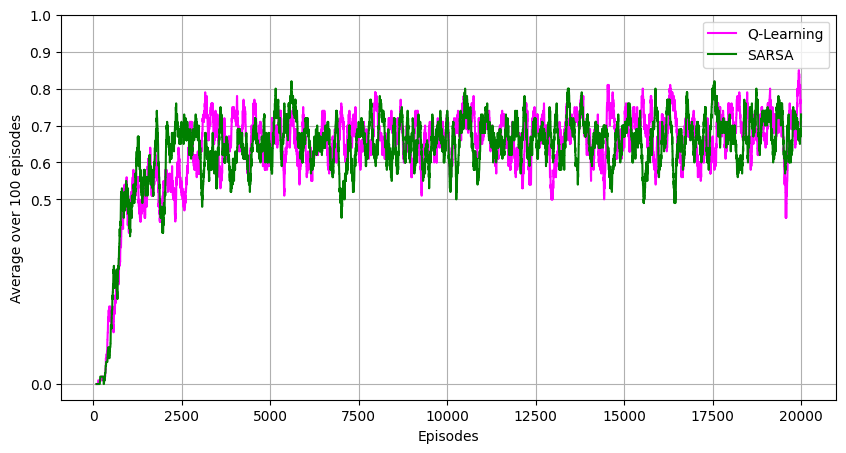

In [90]:
window = 100
q_learning_rewards = rewards_all_1
average_q_learning = []
for ind in range(len(q_learning_rewards) - window + 1):
    average_q_learning.append(np.mean(q_learning_rewards[ind:ind+window]))
for ind in range(window - 1):
    average_q_learning.insert(0, np.nan)

sarsa_rewards = rewards_all_2
average_sarsa = []
for ind in range(len(sarsa_rewards) - window + 1):
    average_sarsa.append(np.mean(sarsa_rewards[ind:ind+window]))
for ind in range(window - 1):
    average_sarsa.insert(0, np.nan)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_learning_rewards)), average_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards)), average_sarsa, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

## FrozenLake8x8-v1

#### *Q-Learning*

In [114]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 400 # Each environment can have a different episode length

q_table_1 = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [115]:
q_table_1, rewards_all_1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [116]:
q_table_1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [94]:
print(sum(rewards_all_1))
print(sum(rewards_all_1[0:1000]))
print(sum(rewards_all_1[1000:2000]))
print(sum(rewards_all_1[2000:3000]))
print(sum(rewards_all_1[9000:10000]))
print(sum(rewards_all_1[19000:20000]))

0.0
0.0
0.0
0.0
0.0
0.0


In [117]:
play_multiple_times(env, q_table_1, 1000)

Number of successes: 0/1000
Average number of steps: nan


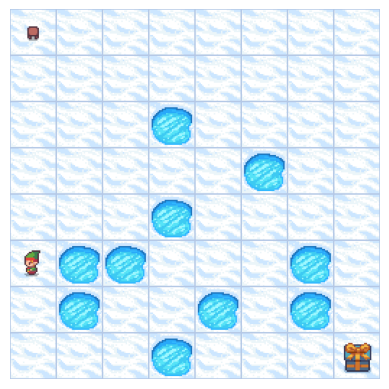

(0.0, 200)

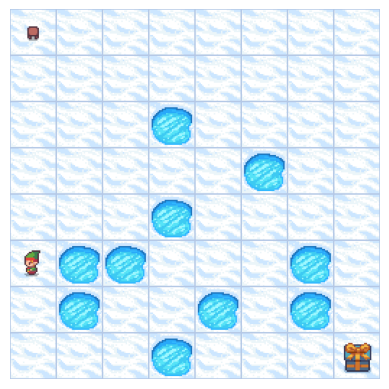

In [39]:
play(env, q_table_1, render=True)

#### *SARSA*

In [118]:
# Initialize Q-value table randomly
q_table_2 = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_2)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [119]:
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [120]:
q_table_2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [121]:
print(sum(rewards_all_2))
print(sum(rewards_all_2[0:1000]))
print(sum(rewards_all_2[1000:2000]))
print(sum(rewards_all_2[2000:3000]))
print(sum(rewards_all_2[9000:10000]))
print(sum(rewards_all_2[11000:12000]))
print(sum(rewards_all_2[14000:15000]))
print(sum(rewards_all_2[19000:20000]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [122]:
play_multiple_times(env, q_table_2, 1000)

Number of successes: 0/1000
Average number of steps: nan


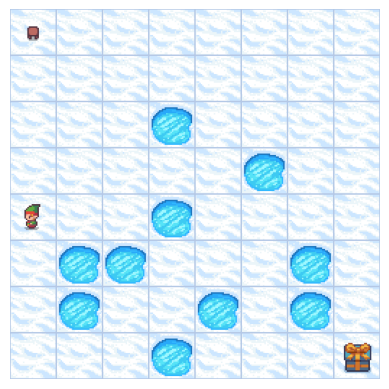

(0.0, 200)

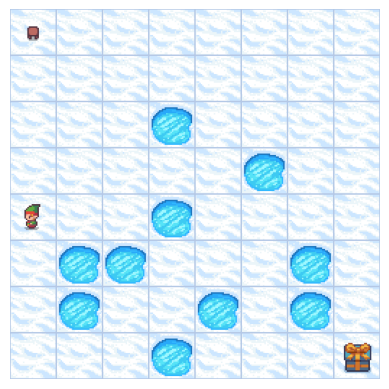

In [124]:
play(env, q_table_2, render=True)

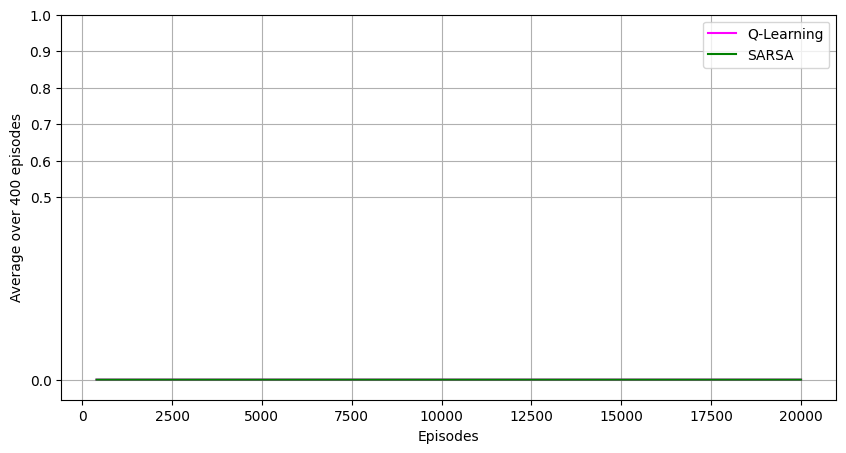

In [123]:
window = 400
q_learning_rewards = rewards_all_1
average_q_learning = []
for ind in range(len(q_learning_rewards) - window + 1):
    average_q_learning.append(np.mean(q_learning_rewards[ind:ind+window]))
for ind in range(window - 1):
    average_q_learning.insert(0, np.nan)

sarsa_rewards = rewards_all_2
average_sarsa = []
for ind in range(len(sarsa_rewards) - window + 1):
    average_sarsa.append(np.mean(sarsa_rewards[ind:ind+window]))
for ind in range(window - 1):
    average_sarsa.insert(0, np.nan)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_learning_rewards)), average_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards)), average_sarsa, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

## Taxi-v3

#### *Q-Learning*

In [102]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

q_table_1 = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_1)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [103]:
q_table_1, rewards_all_1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [104]:
q_table_1

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.66858798, -2.524442  , -3.72427412, -1.38843494,  9.6220697 ,
        -4.99741686],
       [ 1.49037484,  1.33374722,  0.02935624,  3.97288818, 14.11880599,
        -0.55112834],
       ...,
       [-1.3812677 ,  7.29062957, -1.37183908, -1.36152259, -5.62907407,
        -4.98162836],
       [-2.93098591, -2.75500413, -2.92015101, -2.94592557, -6.85682802,
        -3.75472392],
       [-0.28981   , -0.20881   , -0.1999    ,  6.04347362, -1.        ,
        -1.        ]])

In [105]:
print(sum(rewards_all_1))
print(sum(rewards_all_1[0:1000]))
print(sum(rewards_all_1[1000:2000]))
print(sum(rewards_all_1[2000:3000]))
print(sum(rewards_all_1[9000:10000]))
print(sum(rewards_all_1[19000:20000]))

2333.0
-127652.0
-2887.0
6874.0
7320.0
7206.0


In [106]:
play_multiple_times(env, q_table_1, 1000)

Number of successes: 1000/1000
Average number of steps: 13.09


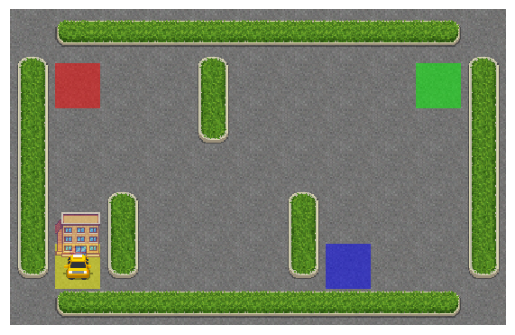

(7, 14)

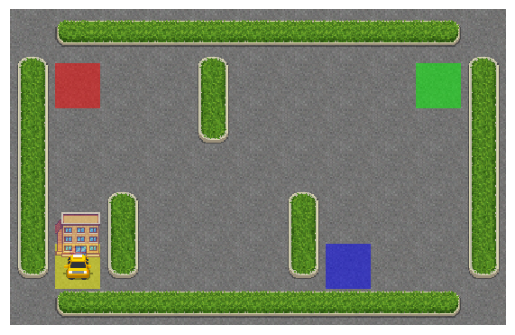

In [52]:
play(env, q_table_1, render=True)

#### *SARSA*

In [107]:
# Initialize Q-value table randomly
q_table_2 = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table_2)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [108]:
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [109]:
q_table_2

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.6308758 , -0.70720403, -2.8367038 , -0.01548571,  8.37863943,
        -4.01310555],
       [-1.80321159,  2.28014519, -1.83771189, -1.58529623, 13.75191661,
        -2.92159115],
       ...,
       [-1.48514608, 13.12798988,  1.43357859,  2.00307764, -0.46140716,
        -2.62203215],
       [-3.43361403, -3.37853014, -3.41528508, -0.76003198, -3.73352389,
        -6.74577243],
       [-0.25766598, -0.3084319 , -0.370729  , 11.03599552, -1.        ,
        -4.10880637]])

In [110]:
print(sum(rewards_all_2))
print(sum(rewards_all_2[0:1000]))
print(sum(rewards_all_2[1000:2000]))
print(sum(rewards_all_2[2000:3000]))
print(sum(rewards_all_2[9000:10000]))
print(sum(rewards_all_2[11000:12000]))
print(sum(rewards_all_2[14000:15000]))
print(sum(rewards_all_2[19000:20000]))

1834.0
-127095.0
-4342.0
7015.0
7355.0
7431.0
7494.0
7442.0


In [111]:
play_multiple_times(env, q_table_2, 1000)

Number of successes: 1000/1000
Average number of steps: 13.098


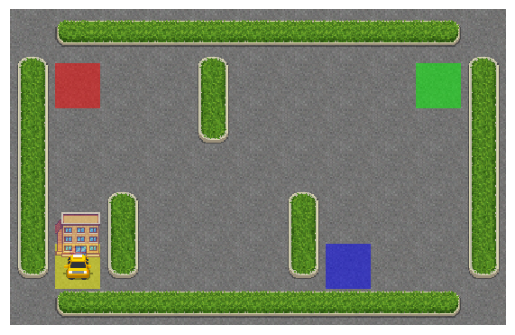

(10, 11)

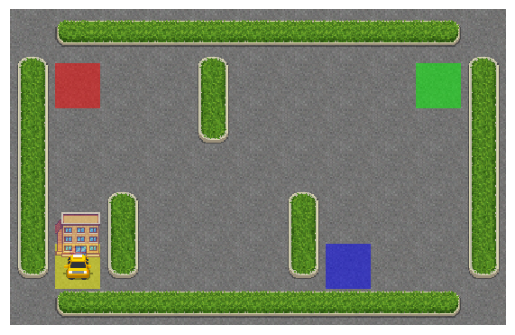

In [58]:
play(env, q_table_2, render=True)

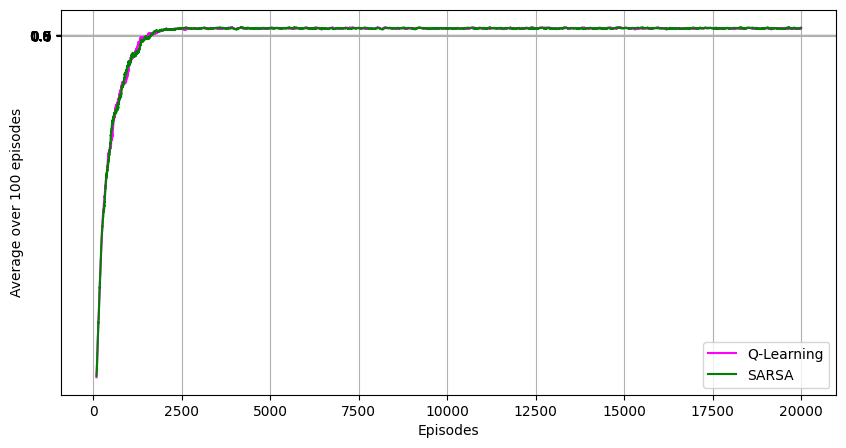

In [112]:
window = 100
q_learning_rewards = rewards_all_1
average_q_learning = []
for ind in range(len(q_learning_rewards) - window + 1):
    average_q_learning.append(np.mean(q_learning_rewards[ind:ind+window]))
for ind in range(window - 1):
    average_q_learning.insert(0, np.nan)

sarsa_rewards = rewards_all_2
average_sarsa = []
for ind in range(len(sarsa_rewards) - window + 1):
    average_sarsa.append(np.mean(sarsa_rewards[ind:ind+window]))
for ind in range(window - 1):
    average_sarsa.insert(0, np.nan)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(q_learning_rewards)), average_q_learning, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards)), average_sarsa, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

## *Nhận xét:*
- **FrozenLake-v1:**
  - Cả hai thuật toán đều học được chính sách tối ưu trong môi trường đơn giản này, với phần thưởng tiệm cận đến 1 sau một số lượt chơi nhất định.
  - *SARSA* có xu hướng đạt được hiệu suất tốt hơn một chút so với *Q-Learning* trong giai đoạn đầu của quá trình học, nhưng sau đó, cả hai đều hội tụ về cùng một hiệu suất tối ưu.
- **FrozenLake8x8-v1:**
  - Môi trường này phức tạp hơn so với **FrozenLake-v1**, do không gian trạng thái lớn hơn và nhiều hơn các hành động có thể thực hiện.
  - Em không rõ là mình có làm sai bước nào không, em đã điều chỉnh số bước đi trong mỗi ván chơi ở môi trường này lên 400 nhưng không cho ra kết quả.
- **Taxi-v3:**
  - Đây là môi trường phức tạp nhất trong số ba môi trường, với không gian trạng thái và hành động lớn hơn.
  - Trong trường hợp này, *SARSA* có thể học được chính sách tối ưu nhanh hơn và đạt được hiệu suất cao hơn đáng kể so với *Q-Learning* trong suốt quá trình học.
  - *Q-Learning* gặp khó khăn hơn trong việc học chính sách tối ưu và có thể bị kẹt trong các tối ưu cục bộ.